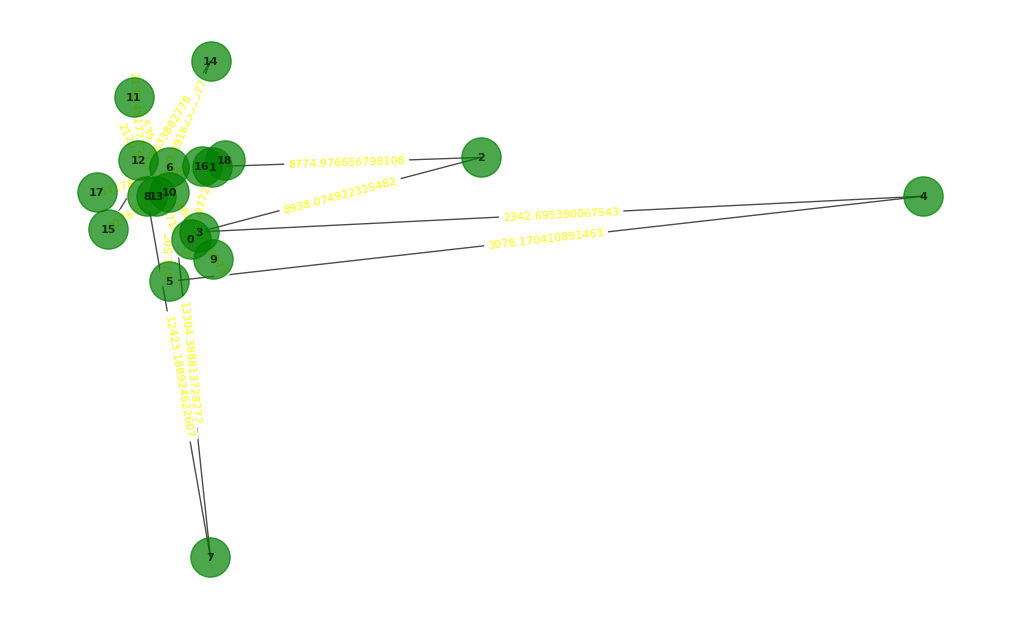

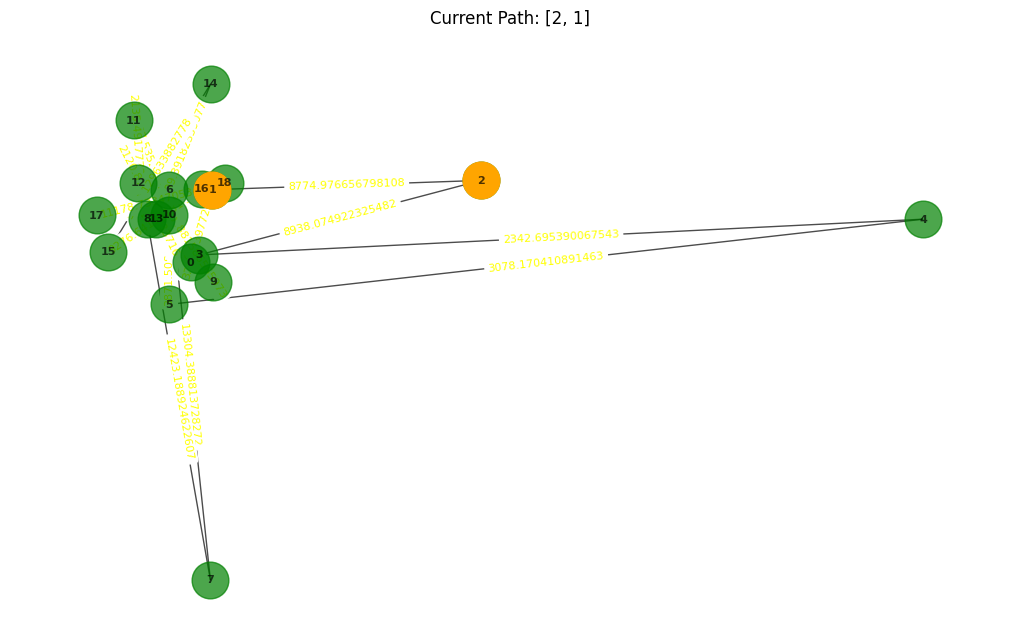

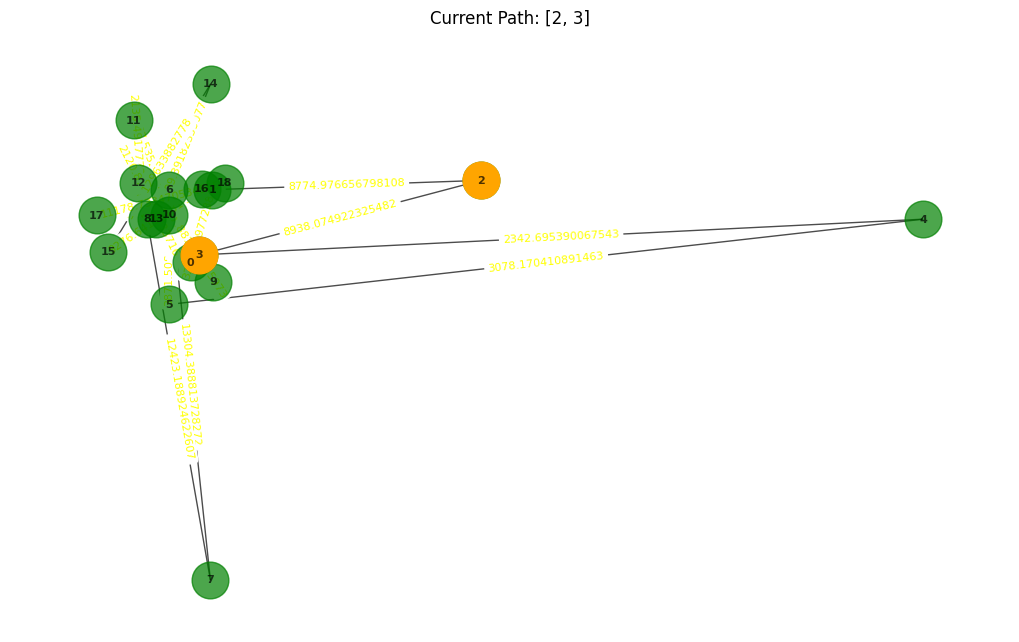

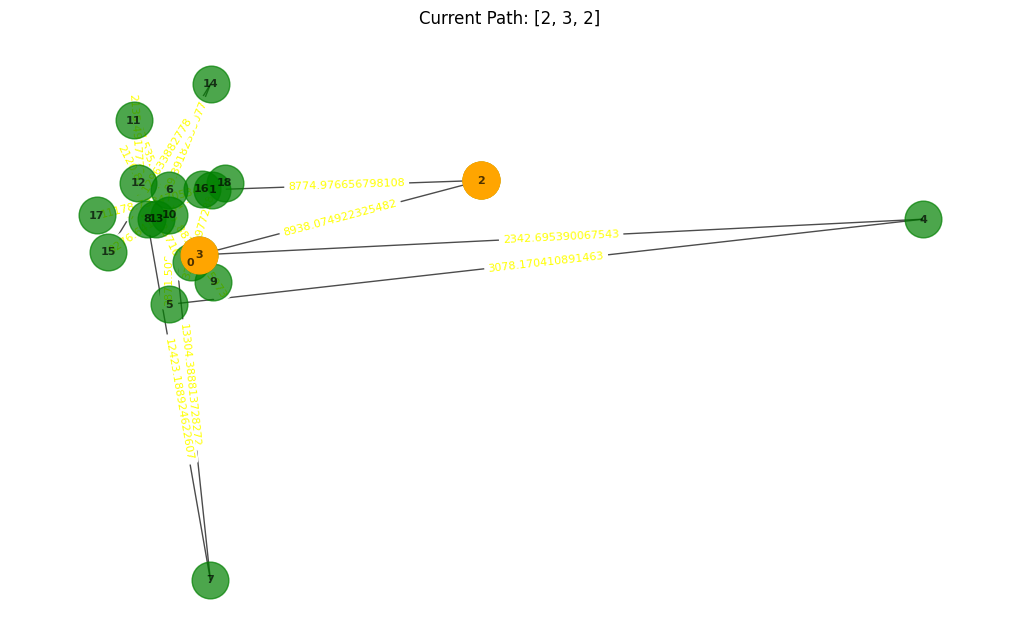

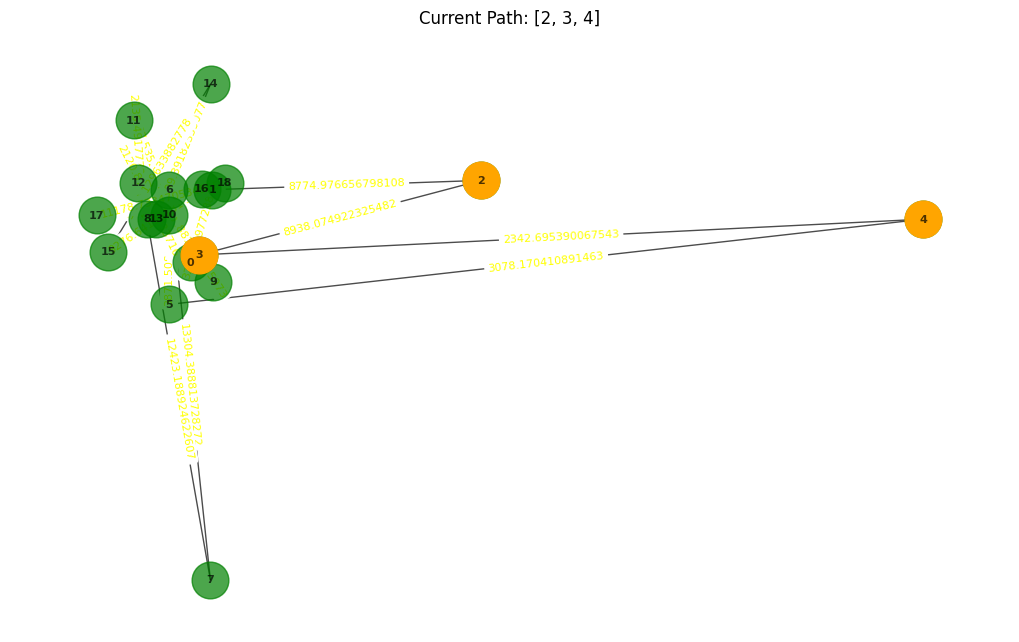

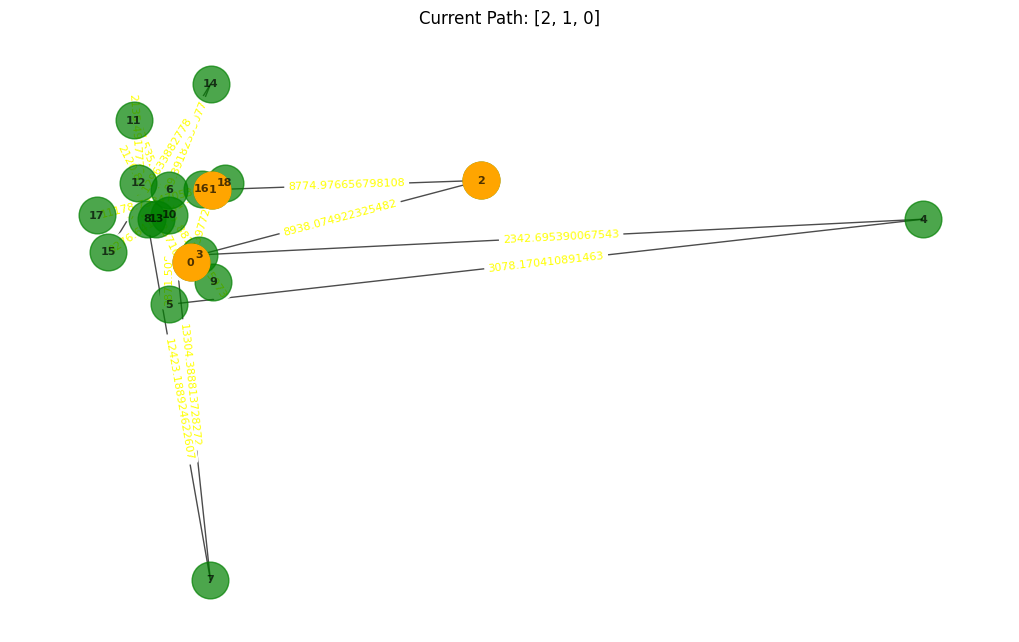

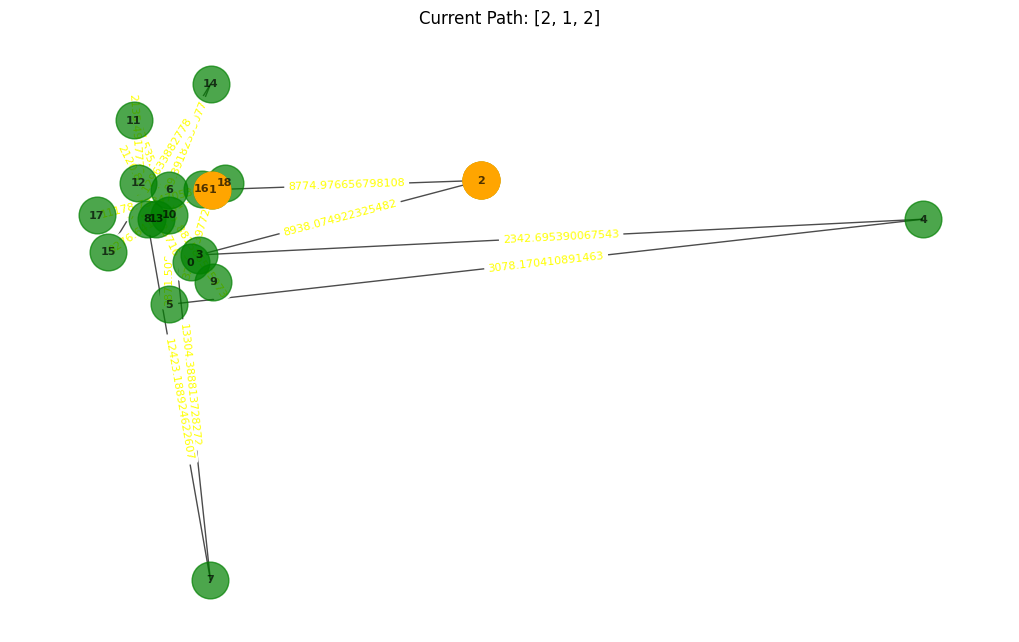

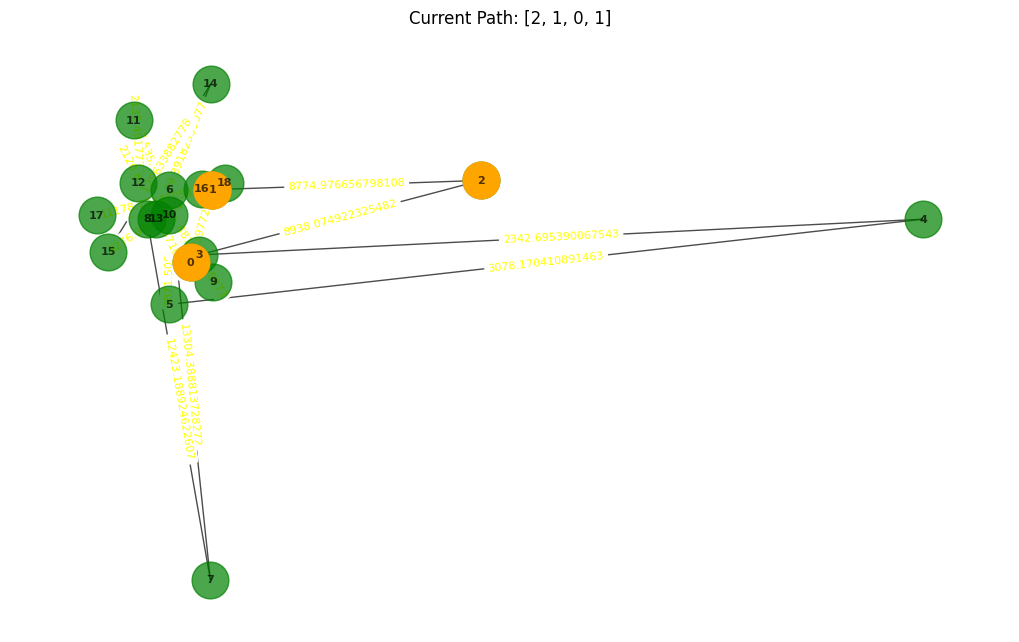

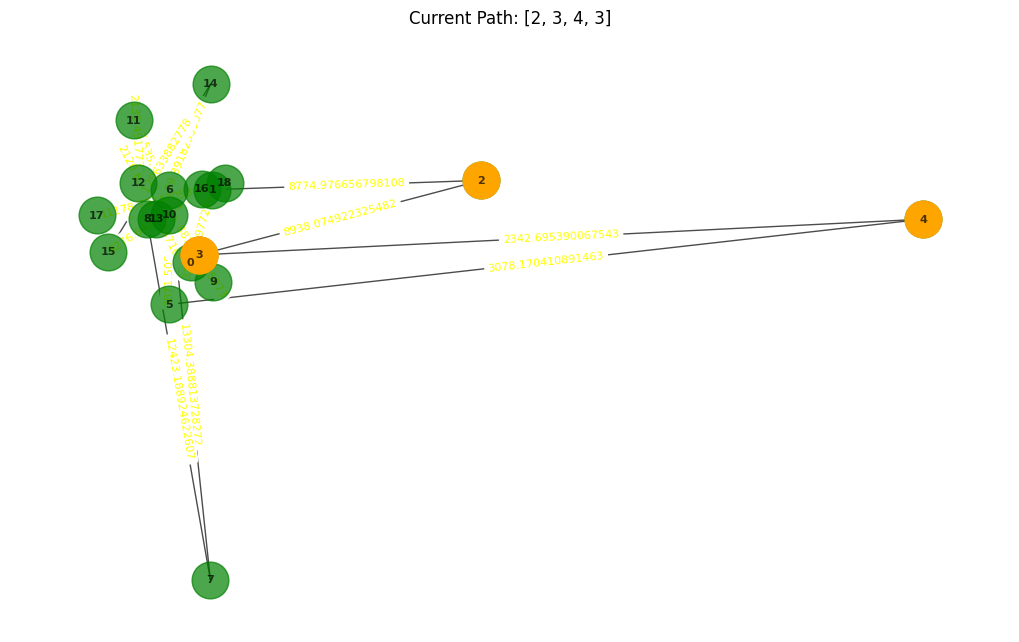

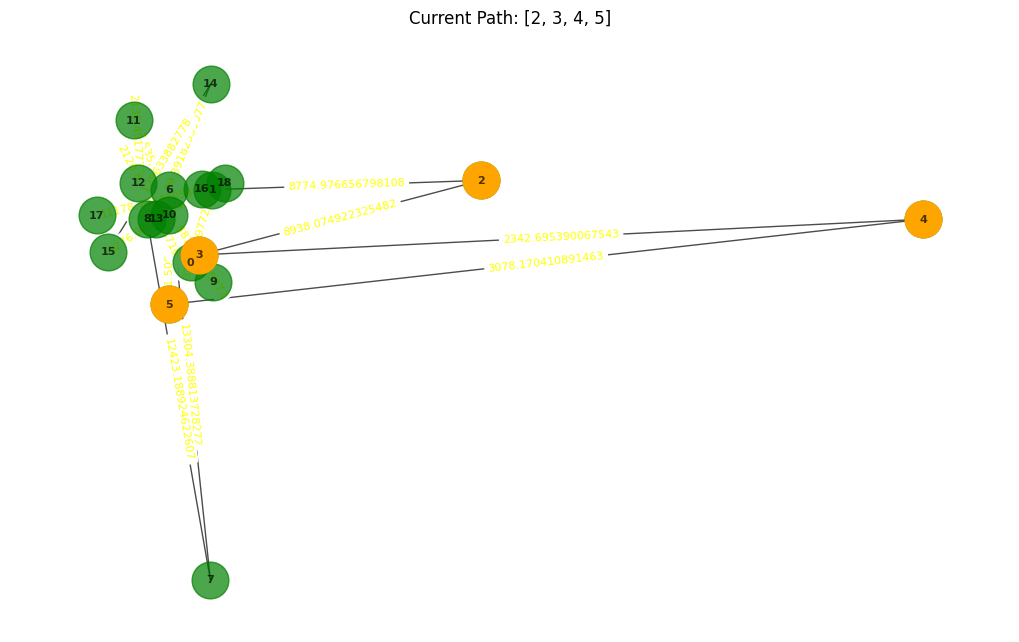

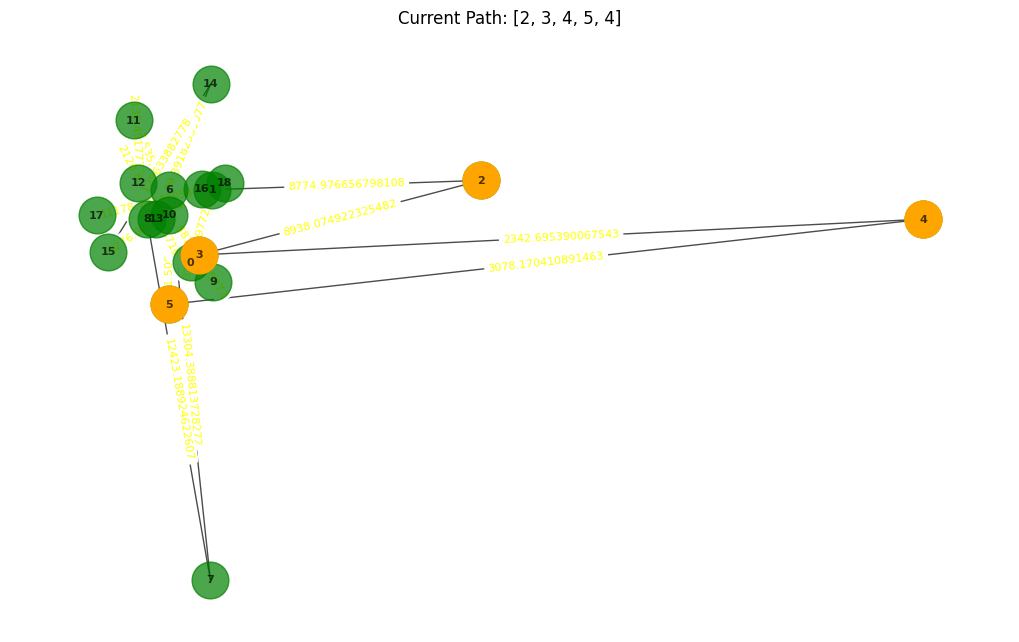

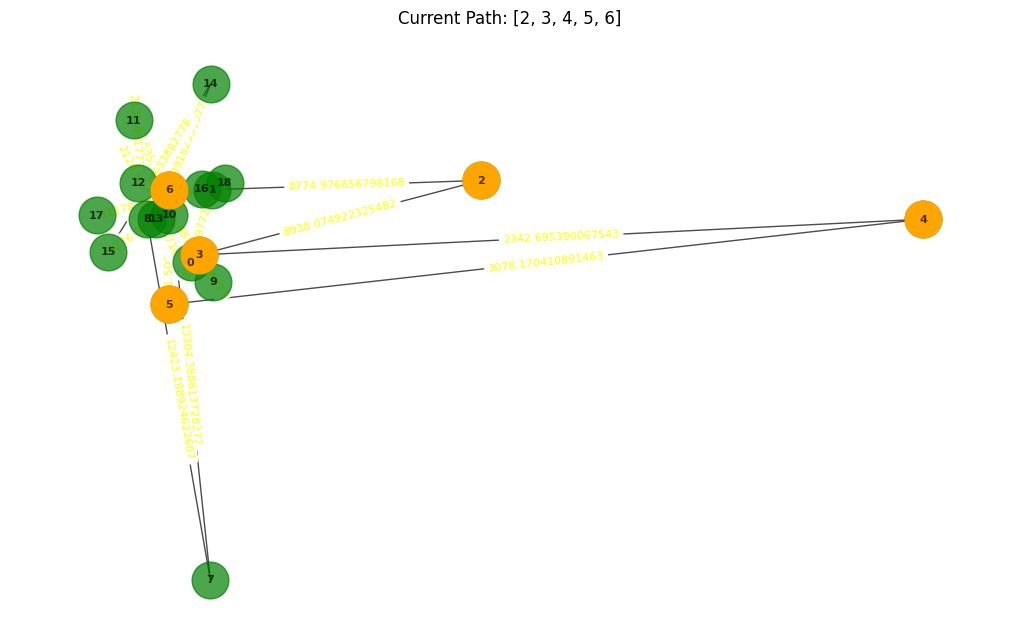

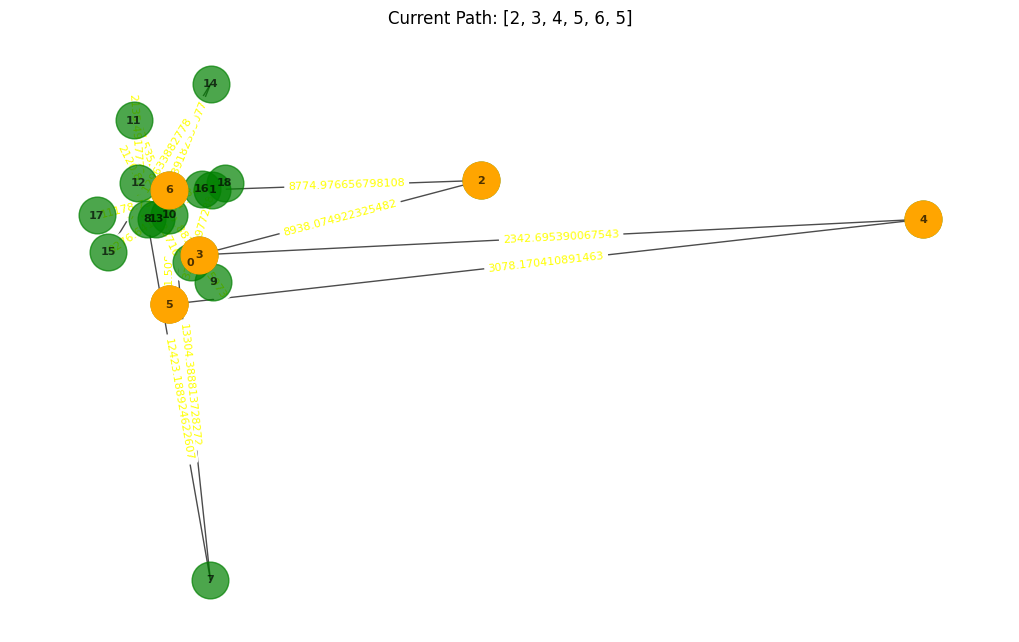

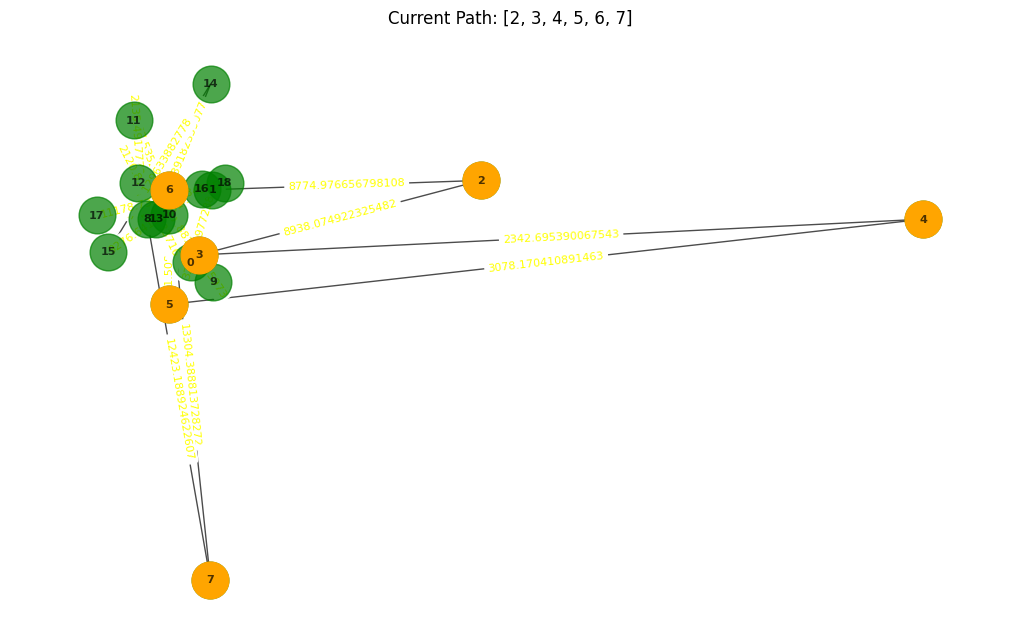

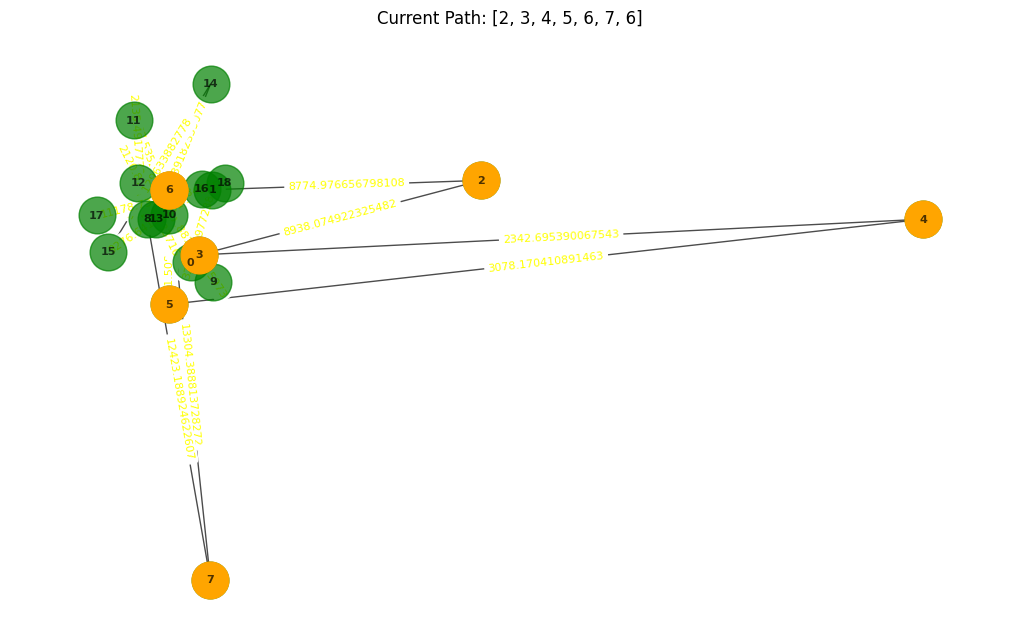

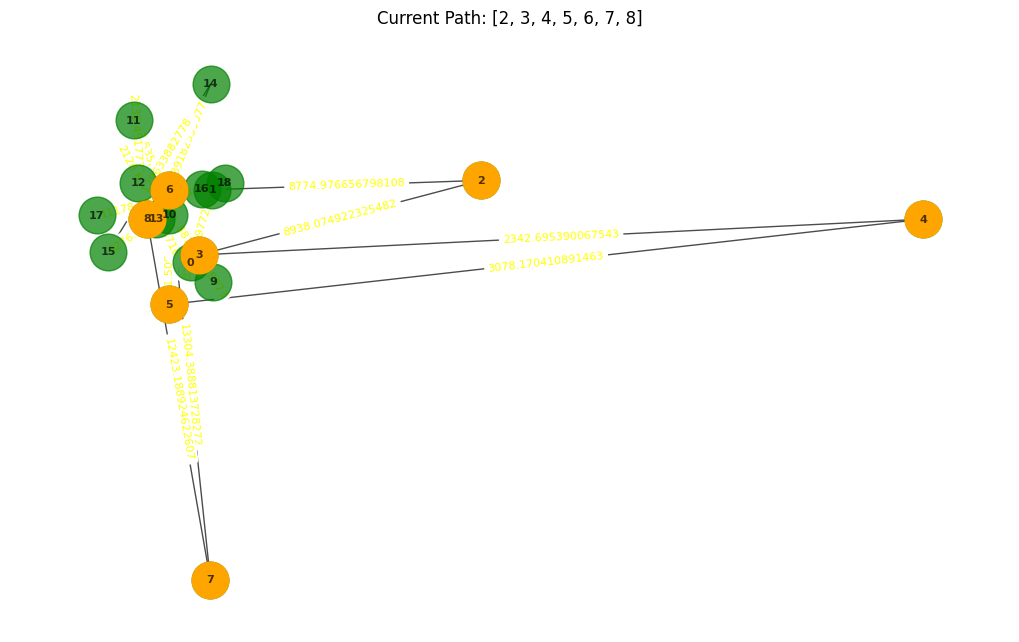

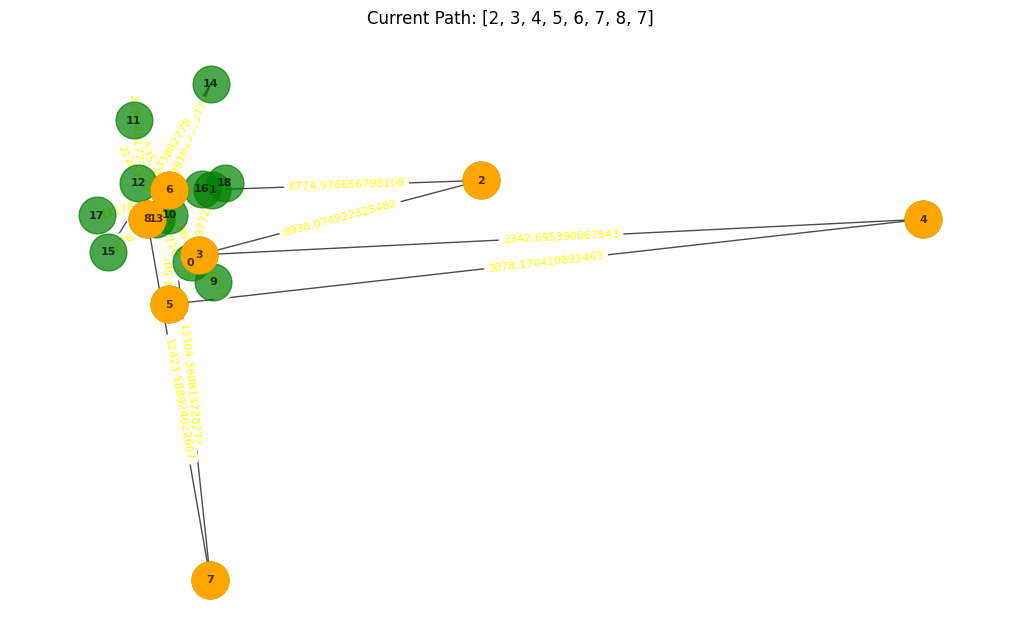

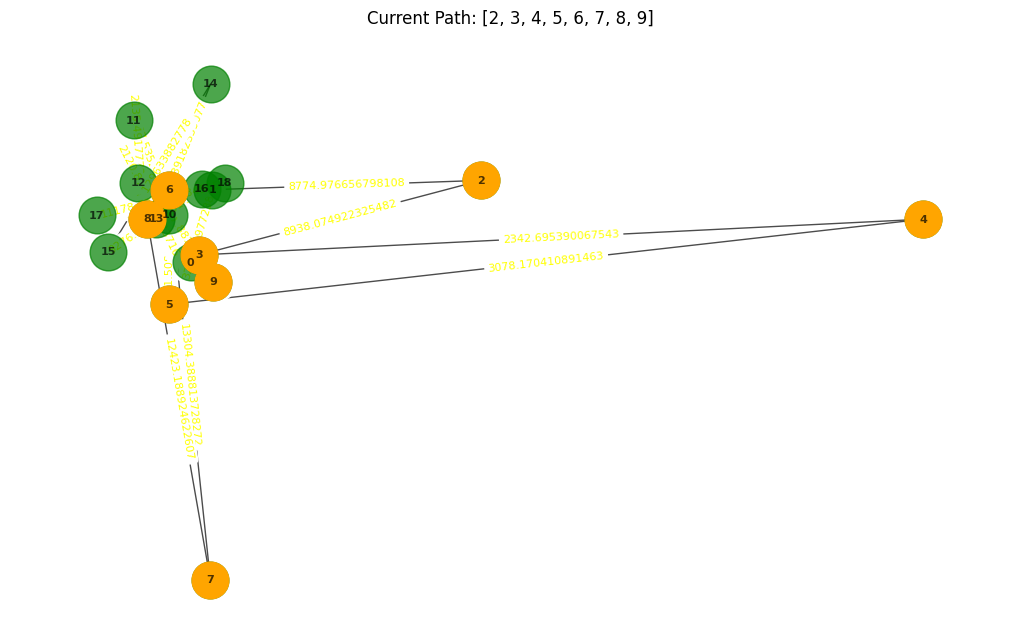

Start node: 2
End node: 9
Shortest path: [2, 3, 4, 5, 6, 7, 8, 9]
Total cost: 51153.83 km
Total time: 1.848206 seconds


In [8]:
import matplotlib.pyplot as plt
import networkx as nx
from geopy.distance import geodesic
from collections import deque
import time
import heapq

file_name = "graph.txt"

with open(file_name, 'r') as file:
    data = file.readlines()

points = []
for line in data:
    components = line.strip().split(',')
    point = (float(components[0]), float(components[1]))
    points.append(point)

G = nx.Graph()
G.add_nodes_from(range(len(points)))
for i in range(len(points) - 1):
    distance_km = geodesic(points[i], points[i + 1]).kilometers
    G.add_edge(i, i + 1, weight=distance_km)

pos = {i: (points[i][1], points[i][0]) for i in range(len(points))}
edge_labels = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=800, node_color='green', font_size=8,
        edge_color='black', alpha=0.7)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='yellow', font_size=8)

start_node = 2
end_node = 9

def heuristic(node):
    
    h = abs(pos[node][0] - pos[end_node][0]) + abs(pos[node][1] - pos[end_node][1])
    return h

def sma_star(graph, start, end, heuristic_func):
    visited = set()
    start_time = time.time()

    priority_queue = [(heuristic_func(start), start, [start])]

    while priority_queue:
        _, current_node, path = heapq.heappop(priority_queue)

        if current_node == end:
            end_time = time.time()
            return path, end_time - start_time

        if current_node not in visited:
            visited.add(current_node)
            neighbors = graph.neighbors(current_node)
            for neighbor in neighbors:
                new_path = path + [neighbor]
                priority = heuristic_func(neighbor) + len(new_path)
                heapq.heappush(priority_queue, (priority, neighbor, new_path))
                
                plt.figure(figsize=(10, 6))
                nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='green', font_size=8,
                        edge_color='black', alpha=0.7)
                nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='yellow', font_size=8)
                nx.draw_networkx_nodes(G, pos, nodelist=new_path, node_color='orange', node_size=700)
              
                plt.axis('off')
                plt.title(f"Current Path: {new_path}")
                plt.show()

path_nodes, execution_time = sma_star(G, start_node, end_node, heuristic)


total_cost = 0
for i in range(len(path_nodes) - 1):
    total_cost += G[path_nodes[i]][path_nodes[i + 1]]['weight']

print(f"Start node: {start_node}")
print(f"End node: {end_node}")
print(f"Shortest path: {path_nodes}")
print(f"Total cost: {total_cost:.2f} km")
print(f"Total time: {execution_time:.6f} seconds")
